In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('movie_rating.csv')
df

,user_id,item_id,rating,timestamp
0,0,50,5,881250949
1,0,172,5,881250949
2,0,133,1,881250949
3,196,242,3,881250949
4,186,302,3,891717742
...,...,...,...,...
99998,880,476,3,880175444
99999,716,204,5,879795543
100000,276,1090,1,874795795
100001,13,225,2,882399156


In [4]:
movie_id = pd.read_csv('movie_id_titles.csv')
movie_id

,item_id,title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)
...,...,...
1677,1678,Mat' i syn (1997)
1678,1679,B. Monkey (1998)
1679,1680,Sliding Doors (1998)
1680,1681,You So Crazy (1994)


In [5]:
data = pd.merge(df, movie_id, on='item_id')

In [6]:
data.head()

,user_id,item_id,rating,timestamp,title
0,0,50,5,881250949,Star Wars (1977)
1,290,50,5,880473582,Star Wars (1977)
2,79,50,4,891271545,Star Wars (1977)
3,2,50,5,888552084,Star Wars (1977)
4,8,50,5,879362124,Star Wars (1977)


In [7]:
# Best Movie
movierat = data.groupby('title').agg({'rating':['mean','count']}).droplevel(level=0, axis=1)

In [8]:
best_movie = movierat.sort_values(['count', 'mean'], ascending=[False,False]).rename(columns={'mean':'Average Rating',
                                                                                             'count' : 'Number of Rating'})

In [9]:
best_movie

,Average Rating,Number of Rating
title,,
Star Wars (1977),4.359589,584
Contact (1997),3.803536,509
Fargo (1996),4.155512,508
Return of the Jedi (1983),4.007890,507
Liar Liar (1997),3.156701,485
...,...,...
"Very Natural Thing, A (1974)",1.000000,1
"Vie est belle, La (Life is Rosey) (1987)",1.000000,1
Wend Kuuni (God's Gift) (1982),1.000000,1


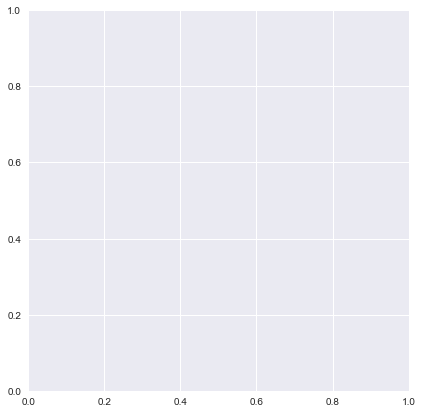

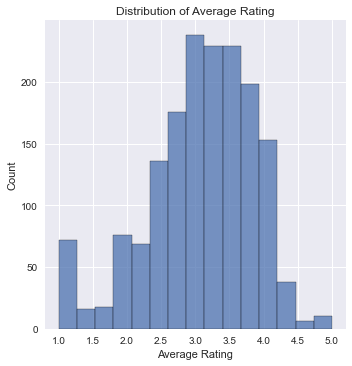

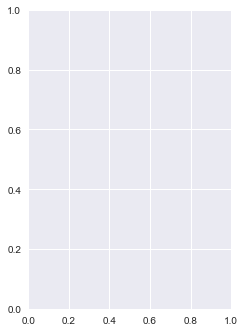

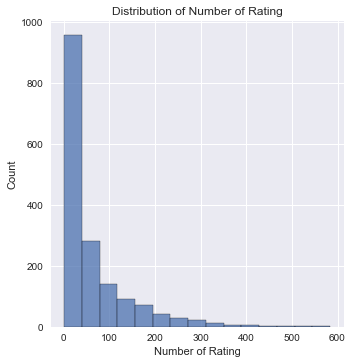

In [10]:
plt.style.use('seaborn')
plt.figure(figsize=(15,7))

for i, j in list(enumerate(best_movie.columns)):
    plt.subplot(1, 2, i+1)
    sns.displot(best_movie[j], bins=15)
    plt.title(f'Distribution of {j}')
    plt.show()

## Create Recommender System : Collaborative Filtering

In [24]:
# Step 1 : Create Pivot Table dengan index merepresentasikan user, column merepresentasikan content, value merepresentasikan rating

moviemat = data.pivot_table(index='user_id', columns='title', values='rating').fillna(0)
moviemat

title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
user_id,,,,,,,,,,,,,,,,,,,,,
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,2.0,5.0,0.0,0.0,3.0,4.0,0.0,0.0,...,0.0,0.0,0.0,5.0,3.0,0.0,0.0,0.0,4.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
939,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
940,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
941,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [27]:
# Step 2 Calculate Correlation between liked movies with all movies
for i in data['title'].unique():
    print(i)


Star Wars (1977)
Empire Strikes Back, The (1980)
Gone with the Wind (1939)
Kolya (1996)
L.A. Confidential (1997)
Heavyweights (1994)
Legends of the Fall (1994)
Jackie Brown (1997)
Dr. Strangelove or: How I Learned to Stop Worrying and Love the Bomb (1963)
Hunt for Red October, The (1990)
Jungle Book, The (1994)
Grease (1978)
Remains of the Day, The (1993)
Men in Black (1997)
Romy and Michele's High School Reunion (1997)
Star Trek: First Contact (1996)
To Wong Foo, Thanks for Everything! Julie Newmar (1995)
Batman Forever (1995)
Only You (1994)
Age of Innocence, The (1993)
Sabrina (1995)
Just Cause (1995)
Endless Summer 2, The (1994)
Man Without a Face, The (1993)
Sabrina (1954)
Die Hard (1988)
Twister (1996)
Toy Story (1995)
Broken Arrow (1996)
Aladdin (1992)
Casper (1995)
Restoration (1995)
Jaws (1975)
Chasing Amy (1997)
Silence of the Lambs, The (1991)
Right Stuff, The (1983)
Sleepless in Seattle (1993)
Sting, The (1973)
Curdled (1996)
Rear Window (1954)
Speechless (1994)
Crumb (1994

In [28]:
film_disukai = 'Star Wars (1977)'
rating_disukai = moviemat[film_disukai]


In [29]:
rating_disukai

user_id
0      5.0
1      5.0
2      5.0
3      0.0
4      5.0
      ... 
939    0.0
940    4.0
941    0.0
942    5.0
943    4.0
Name: Star Wars (1977), Length: 944, dtype: float64

In [33]:
film_serupa = pd.DataFrame(moviemat.corrwith(rating_disukai), 
                          columns=['Correlation']).sort_values('Correlation', ascending=False)
film_serupa

,Correlation
title,
Star Wars (1977),1.000000
Return of the Jedi (1983),0.746797
"Empire Strikes Back, The (1980)",0.555233
Raiders of the Lost Ark (1981),0.540455
Indiana Jones and the Last Crusade (1989),0.467523
...,...
Anna Karenina (1997),-0.116310
"Smile Like Yours, A (1997)",-0.120460
I Know What You Did Last Summer (1997),-0.132151


In [34]:
for i, j in list(enumerate(film_serupa.index[1:11])):
    print(f'{i+1}. {j}')

1. Return of the Jedi (1983)
2. Empire Strikes Back, The (1980)
3. Raiders of the Lost Ark (1981)
4. Indiana Jones and the Last Crusade (1989)
5. Toy Story (1995)
6. Terminator, The (1984)
7. Back to the Future (1985)
8. Alien (1979)
9. Princess Bride, The (1987)
10. Star Trek: First Contact (1996)


In [38]:
# Step 3 : Create Function
def find_me_movie(jumlah_film=10):
    film_disukai = input('Apa Film yang Kamu Sukai ?')
    rating_disukai = moviemat[film_disukai]
    film_serupa = pd.DataFrame(moviemat.corrwith(rating_disukai), 
                          columns=['Correlation']).sort_values('Correlation', ascending=False)
    print(f'Orang-orang yang menyukai {film_disukai}, biasanya juga menonton:')
    for i, j in list(enumerate(film_serupa.index[1:jumlah_film+1])):
        print(f'{i+1}. {j}')

In [40]:
find_me_movie(50)

Apa Film yang Kamu Sukai ?Back to the Future (1985)
Orang-orang yang menyukai Back to the Future (1985), biasanya juga menonton:
1. Indiana Jones and the Last Crusade (1989)
2. Raiders of the Lost Ark (1981)
3. Groundhog Day (1993)
4. Empire Strikes Back, The (1980)
5. Monty Python and the Holy Grail (1974)
6. Forrest Gump (1994)
7. E.T. the Extra-Terrestrial (1982)
8. Jurassic Park (1993)
9. Blues Brothers, The (1980)
10. When Harry Met Sally... (1989)
11. Terminator, The (1984)
12. Apollo 13 (1995)
13. Mrs. Doubtfire (1993)
14. Aladdin (1992)
15. Speed (1994)
16. Dead Poets Society (1989)
17. Princess Bride, The (1987)
18. Stand by Me (1986)
19. Top Gun (1986)
20. Die Hard (1988)
21. Raising Arizona (1987)
22. Sleepless in Seattle (1993)
23. Fugitive, The (1993)
24. Sound of Music, The (1965)
25. Star Trek: The Wrath of Khan (1982)
26. Dances with Wolves (1990)
27. Pulp Fiction (1994)
28. Terminator 2: Judgment Day (1991)
29. Dave (1993)
30. True Lies (1994)
31. Young Frankenstein (1

In [41]:
anime = pd.read_csv('anime.csv')
anime.head()

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266


In [45]:
anime = anime.iloc[:850, :4]
anime

,anime_id,name,genre,type
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV
...,...,...,...,...
845,9471,Baka to Test to Shoukanjuu: Matsuri,"Comedy, School, Super Power",OVA
846,150,Blood+,"Action, Drama, Horror, Military, Mystery, Supe...",TV
847,60,Chrno Crusade,"Action, Demons, Historical, Romance, Supernatural",TV
848,19671,Free!: FrFr - Short Movie,"Comedy, Sports",Special


In [43]:
anime_rating = pd.read_csv('rating.csv')

In [44]:
anime_rating

,user_id,anime_id,rating
0,1,20,-1
1,1,24,-1
2,1,79,-1
3,1,226,-1
4,1,241,-1
...,...,...,...
7813732,73515,16512,7
7813733,73515,17187,9
7813734,73515,22145,10
7813735,73516,790,9


In [46]:
data2 = pd.merge(anime, anime_rating, on='anime_id')

In [47]:
data2

,anime_id,name,genre,type,user_id,rating
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,99,5
1,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,152,10
2,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,244,10
3,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,271,10
4,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,278,-1
...,...,...,...,...,...,...
3337693,120,Fruits Basket,"Comedy, Drama, Fantasy, Romance, Shoujo, Slice...",TV,73490,10
3337694,120,Fruits Basket,"Comedy, Drama, Fantasy, Romance, Shoujo, Slice...",TV,73491,10
3337695,120,Fruits Basket,"Comedy, Drama, Fantasy, Romance, Shoujo, Slice...",TV,73495,7
3337696,120,Fruits Basket,"Comedy, Drama, Fantasy, Romance, Shoujo, Slice...",TV,73500,9


## In-Class Exercise :
1. Merge data anime dengan anime rating, gunakan kolom anime_id untuk merging
2. Coba eksplorasi data, dan munculkan 10 anime dengan count rating dan rata2 rating tertinggi
3. Lihat distribusi dari count rating dan rata2 rating tersebut
4. Buat sistem rekomendasi dengan pendekatan collaborative filtering pada data anime tsb, buat function juga!


In [49]:
# Best Anime
animerat = data2.groupby('name').agg({'rating':['mean','count']}).droplevel(level=0, axis=1)

In [50]:
best_anime = animerat.sort_values(['count', 'mean'], ascending=[False,False]).rename(columns={'mean':'Average Rating',
                                                                                             'count' : 'Number of Rating'})

In [51]:
best_anime

,Average Rating,Number of Rating
name,,
Death Note,7.556177,39340
Sword Art Online,6.863159,30583
Shingeki no Kyojin,7.314089,29584
Code Geass: Hangyaku no Lelouch,7.641244,27718
Elfen Lied,6.753508,27506
...,...,...
Huyao Xiao Hongniang: Yue Hong,6.666667,9
Detective Conan: Episode One - Chiisaku Natta Meitantei,6.800000,5
Seitokai Yakuindomo* OVA,7.000000,1


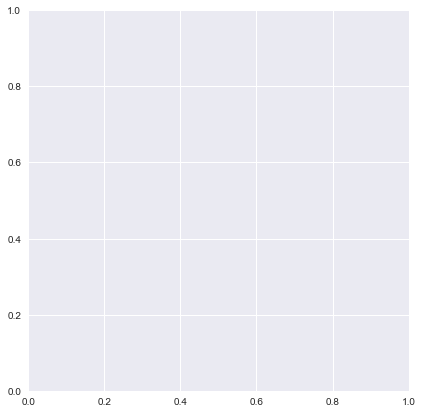

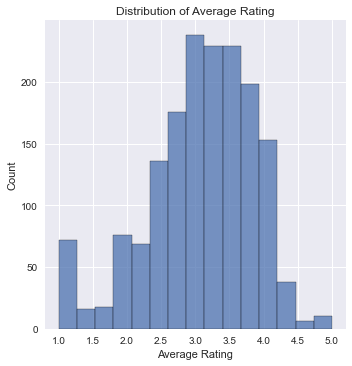

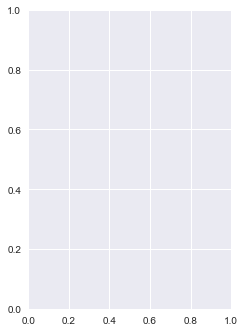

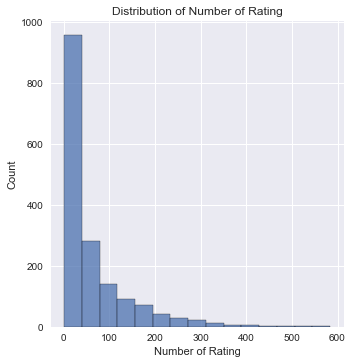

In [56]:
plt.style.use('seaborn')
plt.figure(figsize=(15,7))

for i, j in list(enumerate(best_anime.columns)):
    plt.subplot(1, 2, i+1)
    sns.displot(best_movie[j], bins=15)
    plt.title(f'Distribution of {j}')
    plt.show()

In [55]:
# Step 1 : Create Pivot Table dengan index merepresentasikan user, column merepresentasikan content, value merepresentasikan rating

animemat = data2.pivot_table(index='user_id', columns='name', values='rating').fillna(0)
animemat

name,91 Days,AKB0048: Next Stage,Ajin Part 1: Shoudou,Akachan to Boku,Akagami no Shirayuki-hime,Akagami no Shirayuki-hime 2nd Season,Akame ga Kill!,Akatsuki no Yona,Akira,Angel Beats!,...,Zetsuen no Tempest,Zoku Natsume Yuujinchou,Zoku Sayonara Zetsubou Sensei,ef: A Tale of Melodies.,ef: A Tale of Memories.,xxxHOLiC,xxxHOLiC Kei,xxxHOLiC Movie: Manatsu no Yoru no Yume,xxxHOLiC Rou,xxxHOLiC Shunmuki
user_id,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,0.0,-1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,8.0,0.0,0.0,0.0,...,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,8.0,3.0,...,0.0,0.0,7.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73512,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
73513,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
73514,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [57]:
# Step 2 Calculate Correlation between liked movies with all movies
for i in data2['name'].unique():
    print(i)

Kimi no Na wa.
Fullmetal Alchemist: Brotherhood
Gintama°
Steins;Gate
Gintama&#039;
Haikyuu!!: Karasuno Koukou VS Shiratorizawa Gakuen Koukou
Hunter x Hunter (2011)
Ginga Eiyuu Densetsu
Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare
Gintama&#039;: Enchousen
Clannad: After Story
Koe no Katachi
Gintama
Code Geass: Hangyaku no Lelouch R2
Haikyuu!! Second Season
Sen to Chihiro no Kamikakushi
Shigatsu wa Kimi no Uso
Mushishi Zoku Shou 2nd Season
Ookami Kodomo no Ame to Yuki
Code Geass: Hangyaku no Lelouch
Hajime no Ippo
Rurouni Kenshin: Meiji Kenkaku Romantan - Tsuioku-hen
Cowboy Bebop
One Punch Man
Mononoke Hime
Suzumiya Haruhi no Shoushitsu
Monogatari Series: Second Season
Mushishi Zoku Shou
Mushishi
Tengen Toppa Gurren Lagann
Great Teacher Onizuka
Hajime no Ippo: New Challenger
Mushishi Zoku Shou: Suzu no Shizuku
Natsume Yuujinchou Shi
Howl no Ugoku Shiro
Fate/Zero 2nd Season
Kizumonogatari II: Nekketsu-hen
Monster
Bakuman. 3rd Season
Death Note
Gintama°: Aizome Kaori-hen
Ansatsu Kyo

In [60]:
# Step 3 : Create Function
def find_me_movie(jumlah_film=10):
    film_disukai = input('Apa Film yang Kamu Sukai ? : '   )
    rating_disukai = animemat[film_disukai]
    film_serupa = pd.DataFrame(animemat.corrwith(rating_disukai), 
                          columns=['Correlation']).sort_values('Correlation', ascending=False)
    print(f'Orang-orang yang menyukai {film_disukai}, biasanya juga menonton:')
    for i, j in list(enumerate(film_serupa.index[1:jumlah_film+1])):
        print(f'{i+1}. {j}')

In [61]:
find_me_movie()

Apa Film yang Kamu Sukai ? : Death Note
Orang-orang yang menyukai Death Note, biasanya juga menonton:
1. Code Geass: Hangyaku no Lelouch
2. Code Geass: Hangyaku no Lelouch R2
3. Elfen Lied
4. Fullmetal Alchemist: Brotherhood
5. Fullmetal Alchemist
6. Shingeki no Kyojin
7. Naruto
8. Mirai Nikki (TV)
9. Steins;Gate
10. Darker than Black: Kuro no Keiyakusha


In [62]:
find_me_movie()

Apa Film yang Kamu Sukai ? : Shingeki no Kyojin
Orang-orang yang menyukai Shingeki no Kyojin, biasanya juga menonton:
1. Sword Art Online
2. Tokyo Ghoul
3. No Game No Life
4. Noragami
5. Mirai Nikki (TV)
6. Kiseijuu: Sei no Kakuritsu
7. Akame ga Kill!
8. One Punch Man
9. Psycho-Pass
10. Hataraku Maou-sama!


In [63]:
find_me_movie()

Apa Film yang Kamu Sukai ? : Detective Conan Movie 06: The Phantom of Baker Street
Orang-orang yang menyukai Detective Conan Movie 06: The Phantom of Baker Street, biasanya juga menonton:
1. Detective Conan Movie 05: Countdown to Heaven
2. Detective Conan Movie 04: Captured in Her Eyes
3. Detective Conan Movie 03: The Last Wizard of the Century
4. Detective Conan Movie 08: Magician of the Silver Sky
5. Detective Conan Movie 07: Crossroad in the Ancient Capital
6. Detective Conan Movie 10: Requiem of the Detectives
7. Detective Conan Movie 09: Strategy Above the Depths
8. Detective Conan Movie 02: The Fourteenth Target
9. Detective Conan Movie 01: The Timed Skyscraper
10. Detective Conan Movie 13: The Raven Chaser


In [65]:
find_me_movie()

Apa Film yang Kamu Sukai ? : One Piece Film: Strong World
Orang-orang yang menyukai One Piece Film: Strong World, biasanya juga menonton:
1. One Piece Film: Z
2. One Piece Film: Strong World Episode 0
3. One Piece: Episode of Luffy - Hand Island no Bouken
4. One Piece: Episode of Nami - Koukaishi no Namida to Nakama no Kizuna
5. One Piece 3D2Y: Ace no shi wo Koete! Luffy Nakama Tono Chikai
6. One Piece: Episode of Merry - Mou Hitori no Nakama no Monogatari
7. Katekyo Hitman Reborn!
8. Gintama Movie: Shinyaku Benizakura-hen
9. Hunter x Hunter (2011)
10. Naruto: Shippuuden Movie 6 - Road to Ninja


In [66]:
find_me_movie()

Apa Film yang Kamu Sukai ? : Fairy Tail (2014)
Orang-orang yang menyukai Fairy Tail (2014), biasanya juga menonton:
1. Fairy Tail
2. Owari no Seraph: Nagoya Kessen-hen
3. Nanatsu no Taizai
4. Fairy Tail OVA
5. Noragami Aragoto
6. Boku no Hero Academia
7. Ansatsu Kyoushitsu (TV) 2nd Season
8. Dungeon ni Deai wo Motomeru no wa Machigatteiru Darou ka
9. Akame ga Kill!
10. One Punch Man


In [67]:
df = pd.read_csv('monster_com-job_sample.csv')

In [68]:
df.head()

,country,country_code,date_added,has_expired,job_board,job_description,job_title,job_type,location,organization,page_url,salary,sector,uniq_id
0,United States of America,US,NaN,No,jobs.monster.com,TeamSoft is seeing an IT Support Specialist to...,IT Support Technician Job in Madison,Full Time Employee,"Madison, WI 53702",NaN,http://jobview.monster.com/it-support-technici...,NaN,IT/Software Development,11d599f229a80023d2f40e7c52cd941e
1,United States of America,US,NaN,No,jobs.monster.com,The Wisconsin State Journal is seeking a flexi...,Business Reporter/Editor Job in Madison,Full Time,"Madison, WI 53708",Printing and Publishing,http://jobview.monster.com/business-reporter-e...,NaN,NaN,e4cbb126dabf22159aff90223243ff2a
2,United States of America,US,NaN,No,jobs.monster.com,Report this job About the Job DePuy Synthes Co...,Johnson & Johnson Family of Companies Job Appl...,"Full Time, Employee",DePuy Synthes Companies is a member of Johnson...,Personal and Household Services,http://jobview.monster.com/senior-training-lea...,NaN,NaN,839106b353877fa3d896ffb9c1fe01c0
3,United States of America,US,NaN,No,jobs.monster.com,Why Join Altec? If you’re considering a career...,Engineer - Quality Job in Dixon,Full Time,"Dixon, CA",Altec Industries,http://jobview.monster.com/engineer-quality-jo...,NaN,Experienced (Non-Manager),58435fcab804439efdcaa7ecca0fd783
4,United States of America,US,NaN,No,jobs.monster.com,Position ID# 76162 # Positions 1 State CT C...,Shift Supervisor - Part-Time Job in Camphill,Full Time Employee,"Camphill, PA",Retail,http://jobview.monster.com/shift-supervisor-pa...,NaN,Project/Program Management,64d0272dc8496abfd9523a8df63c184c


In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22000 entries, 0 to 21999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   country          22000 non-null  object
 1   country_code     22000 non-null  object
 2   date_added       122 non-null    object
 3   has_expired      22000 non-null  object
 4   job_board        22000 non-null  object
 5   job_description  22000 non-null  object
 6   job_title        22000 non-null  object
 7   job_type         20372 non-null  object
 8   location         22000 non-null  object
 9   organization     15133 non-null  object
 10  page_url         22000 non-null  object
 11  salary           3446 non-null   object
 12  sector           16806 non-null  object
 13  uniq_id          22000 non-null  object
dtypes: object(14)
memory usage: 2.3+ MB


In [70]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [71]:
anime.isna().sum()

anime_id    0
name        0
genre       0
type        0
dtype: int64

In [73]:
cv = CountVectorizer(tokenizer = lambda x : x.split(', '))
by_jobtitle = cv.fit_transform(df['job_title'])

In [74]:
cos_score = cosine_similarity(by_jobtitle)

MemoryError: Unable to allocate 3.61 GiB for an array with shape (22000, 22000) and data type float64